In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [25]:
df.shape

(1156, 7)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [27]:
df['PURPOSE'].fillna("NOT",inplace=True)

C:\Users\Jibek\AppData\Local\Temp\ipykernel_7940\460660771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT",inplace=True)


In [28]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [29]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [30]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['END_DATE']).hour

# changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                         bins = [0,10,15,19,24],
                         labels = ['Morning','Afternoon','Evening','Night'])



In [31]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night


In [33]:
df.isnull().sum()

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
date          735
time          736
day-night     750
dtype: int64

In [34]:
df.dropna(inplace=True)

In [37]:
df.drop_duplicates(inplace=True)


### Data Visualization

In [38]:
obj = (df.dtypes =='object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 107, 'STOP': 111, 'PURPOSE': 7, 'date': 113}

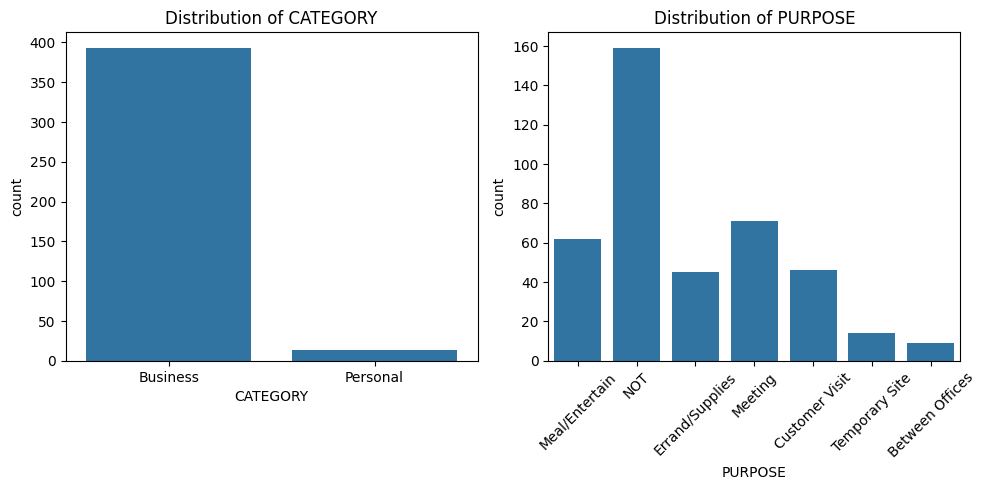

In [51]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x= 'CATEGORY')
plt.xticks(rotation=0)
plt.title('Distribution of CATEGORY')

plt.subplot(1,2,2)
sns.countplot(data=df, x='PURPOSE')
plt.xticks(rotation=45)
plt.title('Distribution of PURPOSE')

plt.tight_layout()
plt.show()


#### Same-same but Different

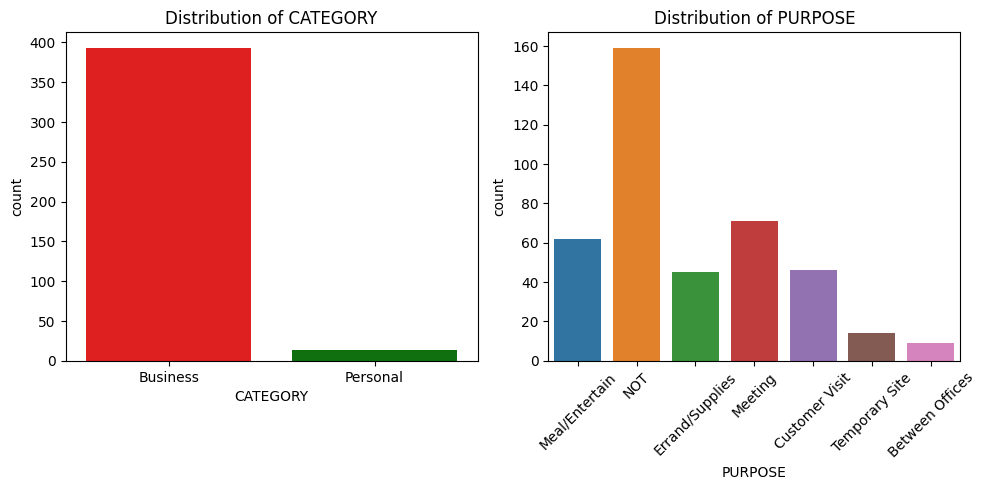

In [59]:
custom_palette = {
    'Business':'red',
    'Personal':'green'
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=df, x= 'CATEGORY', hue='CATEGORY',palette=custom_palette,legend=False)
plt.xticks(rotation=0)
plt.title('Distribution of CATEGORY')

plt.subplot(1,2,2)
sns.countplot(data=df, x='PURPOSE',hue='PURPOSE',palette=colors,legend=False)
plt.xticks(rotation=45)
plt.title('Distribution of PURPOSE')

plt.tight_layout()
plt.show()
